# Lecture 28: `scikit-learn`

## Learning Objectives

By the end of this lecture, you will be able to:

- Use `scikit-learn` to perform supervised learning
- Understand the difference between classification and regression
- Train and evaluate classification models
- Train and evaluate regression models

## `scikit-learn`

`scikit-learn` is a Python package that provides simple and efficient tools for data analysis. It is built on `numpy`, `scipy`, and `matplotlib`. It is open source and commercially usable under the BSD license. It is a great tool for machine learning in Python.

### Installation

To install `scikit-learn`, you can follow the instructions on the [official website](https://scikit-learn.org/stable/install.html). You can install it using `pip`:

```bash
pip install -U scikit-learn
```

## Supervised Learning

In supervised learning, we have a dataset consisting of both input features and output labels. The goal is to learn a mapping from the input to the output. We have two types of supervised learning:

1. Classification: The output is a category.
2. Regression: The output is a continuous value.

### Classification

In classification, we have a dataset consisting of input features and output labels. The goal is to learn a mapping from the input features to the output labels. We can use the `scikit-learn` library to perform classification.

#### Machine Learning by Example: Wine Classification

Let's consider an example of wine classification. We have a dataset of wines with different features such as alcohol content, acidity, etc. We want to classify the wines into different categories based on these features.

##### Step 1: Get the Data

First, we need to load the dataset. We can use the `load_wine` function from `sklearn.datasets` to load the wine dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


```{admonition} Wine Recognition Dataset
:class: tip
The wine recognition dataset is a classic dataset for classification. It contains 178 samples of wine with 13 features each. The features are the chemical composition of the wines, and the target is the class of the wine (0, 1, or 2). You can find more information about the dataset [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset).
```

```{admonition} Your Data
:class: tip
If `pandas` can read your data, you can swap out the `load_wine` function with `pd.read_csv` or any other method you prefer to load your data.
```

##### Step 2: Explore and Visualize the Data

Next, we need to explore and visualize the data to understand its structure and characteristics. We can use `pandas` to explore the data and `seaborn` to visualize it.

In [2]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [3]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

<!-- ```{code-cell} ipython3
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target')

plt.show()
``` -->

##### Step 3: Preprocess the Data

Before training the model, we need to preprocess the data. This involves splitting the data into input features and output labels, normalizing the input features, and splitting the data into training and testing sets.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

```{admonition} Why Split the Data?
:class: tip
Splitting the data into training and testing sets allows us to train the model on one set and evaluate it on another set. This helps us assess the model's performance on unseen data. You can also use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) to evaluate the model's performance more robustly.
```

```{admonition} Why Scale or "Standardize" the Data?
:class: tip
Standardizing the data (*e.g.*, using `StandardScaler`) ensures that each feature has a mean of 0 and a standard deviation of 1. This can help improve the performance of some machine learning algorithms, especially those that are sensitive to the scale of the input features.
```

##### Step 4: Train a Model

Now that we have preprocessed the data, we can train a classification model. We will use the `LogisticRegression` and `RandomForestClassifier` models from `scikit-learn`.

```{admonition} Logistic Regression
:class: tip
Logistic regression is a linear model used for binary classification. It models the probability of the output being in a particular category. You can find more information about logistic regression [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

![Alt text](https://upload.wikimedia.org/wikipedia/commons/c/cb/Exam_pass_logistic_curve.svg)

Canley, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
```

```{admonition} Random Forest
:class: tip
Random forests are an ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes (*i.e.*, the most frequent class) as the prediction. You can find more information about random forests [here](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees).

![Alt text](https://media.datacamp.com/legacy/v1718113325/image_7f309c633f.png)

[DataCamp](https://www.datacamp.com/tutorial/random-forests-classifier-python)
```

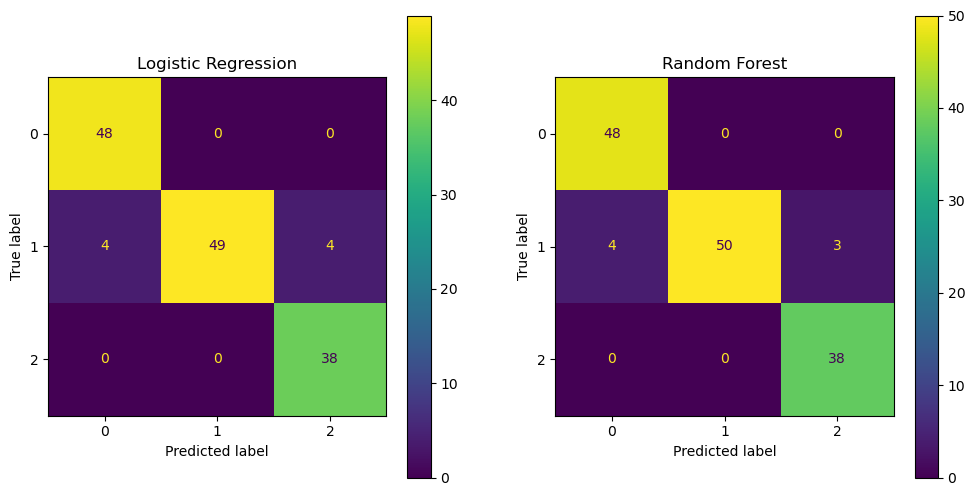

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=ax[0])
ax[0].set_title('Logistic Regression')
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[1])
ax[1].set_title('Random Forest')

plt.show()

```{admonition} Confusion Matrix
:class: tip
A confusion matrix is a table that is often used to describe the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives. You can find more information about confusion matrices [here](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).
```

##### Step 5: Evaluate the Model

Finally, we need to evaluate the model's performance. We can use metrics such as accuracy, precision, recall, and F1 score to evaluate the model.

In [6]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('Random Forest:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.86      0.92        57
           2       0.90      1.00      0.95        38

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.88      0.93        57
           2       0.93      1.00      0.96        38

    accuracy                           0.95       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



```{admonition} Classification Report
:class: tip
A classification report shows the precision, recall, F1 score, and support for each class in the classification model. Precision is the ratio of true positives to the sum of true positives and false positives

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

Recall is the ratio of true positives to the sum of true positives and false negatives

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

The F1 score is the harmonic mean of precision and recall

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Support is the number of occurrences of each class in the dataset.
```

##### Step 6: Plot and Interpret the Coefficients

For the logistic regression model, we can plot and interpret the coefficients to understand the importance of each feature in the classification.

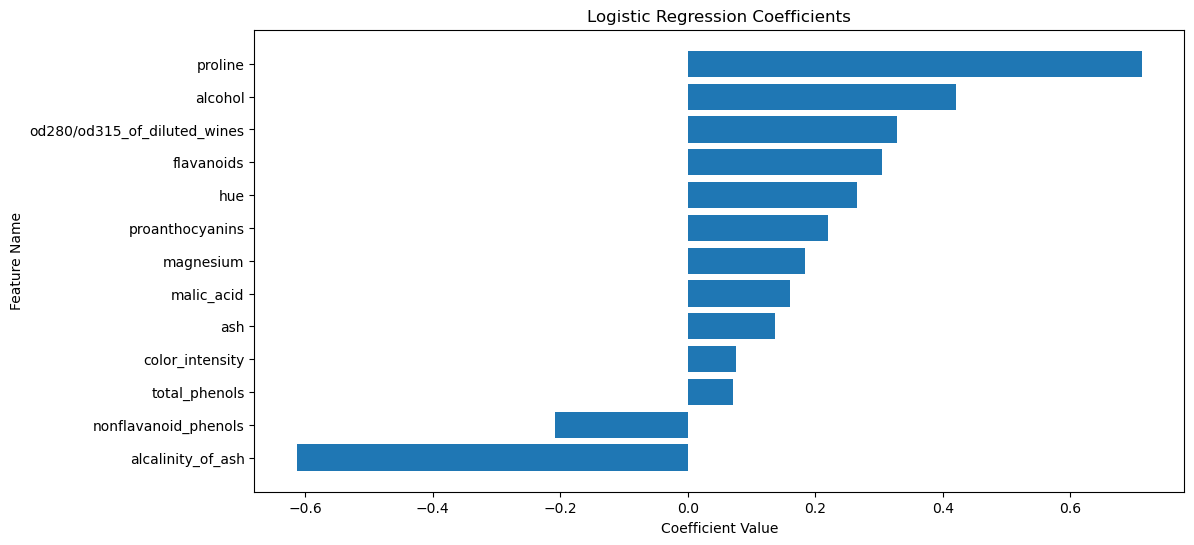

In [7]:
import numpy as np

# Ensure feature names are a NumPy array
feature_names = np.array(data.feature_names)

# Sort the coefficients
sorted_idx = lr.coef_[0].argsort()

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_idx], lr.coef_[0][sorted_idx])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Logistic Regression Coefficients')
plt.show()

The plot above shows the coefficients of the logistic regression model. The features with the largest coefficients (in absolute value) are the most important for the classification. The sign of the coefficient indicates the direction of the relationship between the feature and the target. The two features with the largest coefficients are `proline` and `alcalinity_of_ash`.

`proline` is the amount of proline in the wine. Proline is an amino acid that is found in high concentrations in red wines. The coefficient for `proline` is positive, indicating that wines with higher proline content are more likely to be classified as class 2.

```{figure} https://upload.wikimedia.org/wikipedia/commons/4/45/L-Proline.svg
---
width: 200px
name: proline
---
The chemical structure of proline. By Qohelet12, CC0, via Wikimedia Commons
```

`alcalinity_of_ash` is the amount of ash in the wine. Ash is the inorganic residue remaining after the water and organic matter have been removed by heating. The coefficient for `alcalinity_of_ash` is negative, indicating that wines with lower ash content are more likely to be classified as class 2.

```{admonition} Your Data
:class: tip
You can swap out the wine dataset with your own dataset to perform classification on your data. Make sure to preprocess the data, train the model, and evaluate the model as shown in the example above.
```

### Regression

Under construction...